In [171]:
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [172]:
train_dir ="../input/mnistasjpg/trainingSet/trainingSet"
test_dir  ="../input/mnistasjpg/trainingSample/trainingSample" 

In [173]:
img = cv2.imread(train_dir+"/0/img_108.jpg", cv2.IMREAD_UNCHANGED)
dimensions = img.shape
img.shape

(28, 28)

In [174]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  11,   0,  12,
          0,   7,   7,   0,   3,   4,   0,   0,   3,  10,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   4,
          4,   4,   0,   0,   2,   0,   0,   9,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
          0,   0,   3,  13,   4,   0,   7,  18,   0,   0,  23,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,   6,   6,   0,   0,
          0,   3,   8,   0,   0,   0,   0,   0,  11,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0,  14,
          0,   0,   0,  12,   0,  11,  21,   0,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  12,  46, 203,
        255, 254, 137, 116,  26,   0,   8,   1,   1,  14,   6,   0,   0,
          0,   0],
       [  

In [175]:
training_datagen = ImageDataGenerator(rescale=1./255)
train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 10,
    class_mode = "sparse"
)

Found 42000 images belonging to 10 classes.


In [176]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 10,
    class_mode = "sparse"
)

Found 600 images belonging to 10 classes.


In [177]:
train_generator.target_size,test_generator.target_size

((28, 28), (28, 28))

In [187]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True


In [179]:
callbacks = myCallback()

In [180]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(64, 3, 3, input_shape=(28,28,1)),
    tf.keras.layers.Flatten(input_shape=(28, 28,3)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [181]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [182]:

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 2352)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 200)               470600    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2010      
Total params: 472,610
Trainable params: 472,610
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.output_shape

(None, 10)

In [184]:
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=test_generator,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/15
4200/4200 [==============================] - 29s 7ms/step - loss: 0.2243 - accuracy: 0.9322 - val_loss: 0.1177 - val_accuracy: 0.9617
Epoch 2/15
4200/4200 [==============================] - ETA: 0s - loss: 0.1060 - accuracy: 0.9679
Reached 99.9% accuracy so cancelling training!
4200/4200 [==============================] - 30s 7ms/step - loss: 0.1060 - accuracy: 0.9679 - val_loss: 0.0623 - val_accuracy: 0.9817


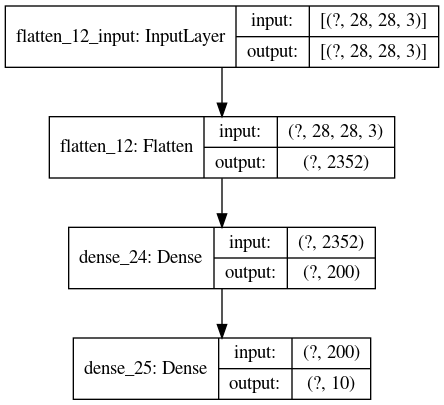

In [186]:
tf.keras.utils.plot_model(model, show_shapes=True)